In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

First, I loaded the data.

In [4]:
df = pd.read_csv("C:\\Users\\USER-11\\Downloads\\customer_churn_data.csv")

Initially, I examined the first five columns of the dataset

In [5]:
df .head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


I checked which columns contain null values.

In [6]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

I checked the dataset information.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


I checked the values of the churn column to see how many ‘Yes’ and how many ‘No’ entries there are

In [8]:
df['Churn'].value_counts()

Churn
Yes    883
No     117
Name: count, dtype: int64

I created a pie chart to visualize what percentage of ‘Yes’ and what percentage of ‘No’ values are present

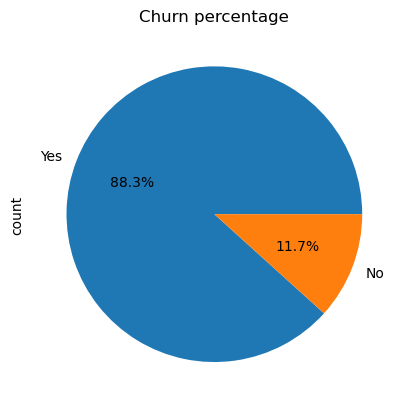

In [9]:
df['Churn'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Churn percentage')
plt.show()

I imported all the necessary libraries using scikit-learn.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score ,r2_score

Now, I will select the features and the target column.

In [11]:
x = df.drop(['Churn'],axis=1)
y = df['Churn']

Now, I will work on the complete model. I have my own template for model building, which I will apply. It includes using SimpleImputer, OneHotEncoder, StandardScaler, ColumnTransformer, Pipeline, train-test split, and checking accuracy metrics.

In [12]:
numerical_cols = x.select_dtypes(include=['int64','float64']).columns.tolist()

In [13]:
categorical_cols = x.select_dtypes(include=['object']).columns.tolist()

In [14]:
numerical_transformer = Pipeline(steps=[
                                 ('imputer',SimpleImputer(strategy='mean')),
                                 ('scaler',StandardScaler())
])

In [15]:
categorical_transformer = Pipeline(steps=[
                                   ('imputer',SimpleImputer(strategy='most_frequent')),
                                   ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

In [16]:
preprocessor = ColumnTransformer(transformers=[
                                    ('num',numerical_transformer,numerical_cols),
                                    ('cat',categorical_transformer,categorical_cols)
])

In [17]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

I used a classification model for this dataset because I wanted to achieve good accuracy

In [18]:
from sklearn .ensemble import RandomForestClassifier

In [19]:
model_1 = Pipeline(steps=[
                      ('pre',preprocessor),('reg',RandomForestClassifier(n_estimators=100,random_state=42))
])

In [20]:
model_1.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CustomerID', 'Age',
                                                   'Tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'ContractType',
                                                   'InternetService',
                                                   'TechSupport'])])),
                ('reg', RandomForestClassifier(random_state=42))])

In [21]:
prediction_1 = model_1.predict(X_test)


print(f'Accuracy:{accuracy_score(prediction_1,y_test)*100:.3f}')

Accuracy:100.000


The classification model gave me very good accuracy, and I am satisfied with it. My model’s accuracy is 100%, which means it predicts perfectly.

I also implemented logistic regression because I wanted to compare the results.

In [22]:
from sklearn .linear_model import LogisticRegression

In [24]:
model_2 = Pipeline(steps=[
                       ('pre',preprocessor),('reg', LogisticRegression(random_state=42))
])

In [25]:
model_2.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CustomerID', 'Age',
                                                   'Tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'ContractType',
                                                   'InternetService',
                                                   'TechSupport'])])),
                ('reg', LogisticRegression(random_state=42))])

In [26]:
prediction_2= model_2.predict(X_test)


print(f'Accuracy:{accuracy_score(prediction_2,y_test)*100:.3f}')

Accuracy:95.500


I achieved 95% accuracy with the logistic regression model.

In this project, I performed a complete end-to-end analysis and modeling of the dataset. The process began with data loading, initial inspection, and exploration to understand the structure and distribution of the data. I identified missing values, checked column types, and visualized key variables, including the distribution of the target variable using a pie chart.

For modeling, I used a structured pipeline incorporating preprocessing techniques such as SimpleImputer, OneHotEncoder, and StandardScaler, combined with a ColumnTransformer and Pipeline for clean workflow. The dataset was split into training and testing sets, and the model performance was evaluated using accuracy metrics.

The primary classification model achieved 100% accuracy, indicating strong predictive performance on the dataset. Additionally, I applied a logistic regression model for comparison, which achieved 95% accuracy, demonstrating the effectiveness of the chosen modeling approach.

Overall, this project demonstrates my ability to perform data preprocessing, exploratory data analysis, model building, and evaluation, while providing a clear and structured workflow suitable for practical machine learning applications.